In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import tensorflow
from tensorflow import keras
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GlobalMaxPooling1D
from keras.layers import BatchNormalization, ReLU
import tensorflow.keras.optimizers

In [2]:
data = pd.read_csv("C:\\Users\\YongGyu\\OneDrive - 한국산업기술대학교\\문서\카카오톡 받은 파일\\Bear_combine.csv")
y_data = data['label']
x_data = data.drop('label', axis=1)
x_data = x_data.drop('index', axis=1)

x_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.358528,0.207419,-0.206120,0.162395,0.296574,-0.084121,-0.145344,0.141487,0.017823,-0.289957,...,0.021152,-0.110348,0.046201,0.079127,-0.094352,0.081157,0.243512,-0.071657,0.102065,0.216554
1,-0.055255,0.255935,-0.027120,-0.154600,0.089399,0.112824,-0.069952,0.001543,0.168444,-0.064024,...,-0.033859,-0.057204,-0.129794,-0.099345,0.018797,-0.128414,0.072428,0.257031,-0.015996,-0.046242
2,0.052362,0.071764,0.100970,0.116199,0.105977,0.055283,-0.031710,-0.066548,-0.050068,-0.022113,...,0.123709,0.130176,0.121414,0.120788,0.126421,0.122457,0.107646,0.069052,0.043809,0.060290
3,0.162882,-0.025171,0.053590,0.129023,-0.056067,0.010434,-0.062928,-0.100157,-0.061061,-0.090008,...,0.038447,-0.019000,0.100726,0.136818,0.004953,-0.064552,-0.000284,0.023669,0.046283,-0.000447
4,0.103265,0.134140,0.150620,0.120997,0.057578,-0.008345,-0.051528,-0.059038,-0.023991,0.029415,...,0.071138,0.097841,0.124335,0.143527,0.132888,0.089287,0.015229,-0.069886,-0.113695,-0.122666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.109644,-0.041827,0.035736,-0.096649,-0.083654,0.054822,-0.016650,-0.073908,0.041421,-0.015837,...,-0.395123,0.112486,0.239186,-0.189237,-0.100304,0.373601,0.362636,-0.078781,-0.064162,0.248526
14996,0.060507,-0.062944,-0.038172,0.045888,-0.021117,-0.105177,-0.013401,-0.099898,-0.139288,0.058883,...,0.188425,-0.032893,-0.080811,0.025990,-0.056040,-0.102334,0.082030,0.111674,0.038984,0.098679
14997,-0.008528,-0.136852,0.069441,-0.159999,-0.516138,-0.108425,0.244465,-0.129542,-0.356139,-0.015837,...,0.015431,-0.053198,0.051979,0.196140,0.041827,0.047918,0.144567,0.037766,0.012589,0.040203
14998,0.110050,0.224567,-0.117359,-0.186394,0.009340,-0.031675,-0.079593,-0.157156,-0.268424,-0.235125,...,-0.037360,0.066598,0.059695,0.035330,0.023147,0.056446,0.126293,0.148222,0.142537,0.094618


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, 
                                                  test_size=0.2, stratify=y_train, 
                                                  random_state=1)
x_train.shape, x_valid.shape, x_test.shape

((9600, 100), (2400, 100), (3000, 100))

No handles with labels found to put in legend.


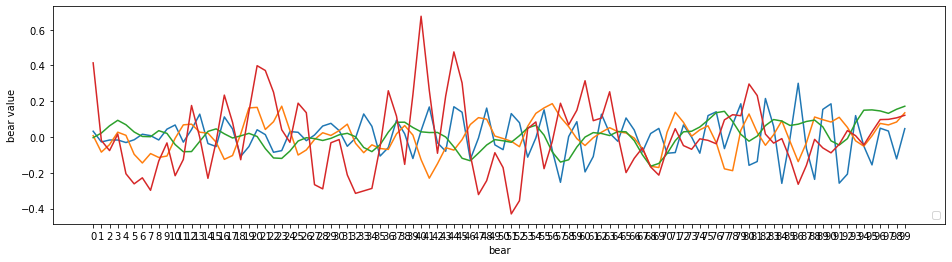

In [4]:
import random 

labels = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure(figsize = (16, 4))

# 무작위로 고른 특정 시간에서의 샘플 출력 
for c in labels:
    c_x_train = x_train[y_train == c]
    time_t = random.randint(0, c_x_train.shape[0])
    
    # 비정상 샘플 
    if c == 0 :
        plt.plot(x_train.iloc[time_t])

    # 정상 샘플
    if c == 1 : 
        plt.plot(x_train.iloc[time_t])
        
    if c == 2 : 
        plt.plot(x_train.iloc[time_t])
        
    if c == 3 : 
        plt.plot(x_train.iloc[time_t])

plt.legend(loc="lower right")
plt.xlabel("bear")
plt.ylabel("bear value")
plt.show()

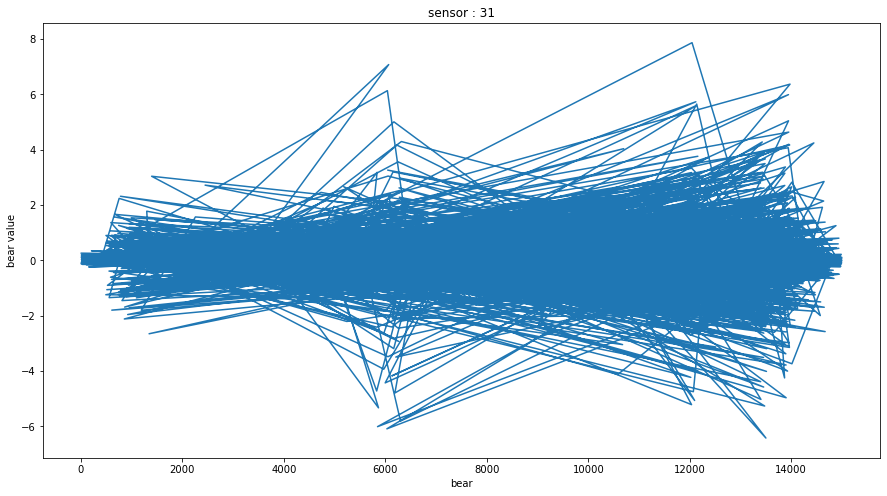

In [5]:
num = random.randint(0,99)
plt.figure(figsize = (15, 8))
#plt.scatter(range(0, 99), c_x_train.iloc[num], label="class = "+str(int(c)), marker ='o', s=5)    

plt.plot(x_train[str(num)])
plt.title("sensor : {}".format(num))
plt.xlabel("bear")
plt.ylabel("bear value")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)

x_train = std.transform(x_train)
x_valid = std.transform(x_valid)

std = StandardScaler()
std.fit(x_test)

x_test = std.transform(x_test)

x_train_c = np.expand_dims(x_train, -1)
x_valid_c = np.expand_dims(x_valid, -1)
x_test_c = np.expand_dims(x_test, -1)

y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)
y_test = y_test.astype(np.float32)

In [7]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV, train_test_split

 
model = Sequential()

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(Conv1D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(ReLU())

model.add(GlobalMaxPooling1D())
model.add(Dense(4, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose = 3)
model_checkpoint = ModelCheckpoint(filepath='./{epoch}-{val_loss:.2f}-{val_sparse_categorical_accuracy:.2f}', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lronplateau = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 20, min_lr = 0.00001)



In [8]:
history = model.fit(x_train_c, y_train,
                    batch_size = 64,
                    epochs = 100,
                    callbacks=[early_stopping, model_checkpoint],
                    validation_data = (x_valid_c, y_valid), verbose = 1)


Epoch 1/100
150/150 [==============================] - ETA: 0s - loss: 0.6850 - sparse_categorical_accuracy: 0.7218
Epoch 1: val_loss improved from inf to 0.94708, saving model to .\1-0.95-0.59


INFO:tensorflow:Assets written to: .\1-0.95-0.59\assets


INFO:tensorflow:Assets written to: .\1-0.95-0.59\assets


150/150 [==============================] - 12s 75ms/step - loss: 0.6850 - sparse_categorical_accuracy: 0.7218 - val_loss: 0.9471 - val_sparse_categorical_accuracy: 0.5925
Epoch 2/100
150/150 [==============================] - ETA: 0s - loss: 0.3739 - sparse_categorical_accuracy: 0.8599
Epoch 2: val_loss improved from 0.94708 to 0.76283, saving model to .\2-0.76-0.69


INFO:tensorflow:Assets written to: .\2-0.76-0.69\assets


INFO:tensorflow:Assets written to: .\2-0.76-0.69\assets


150/150 [==============================] - 10s 65ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.8599 - val_loss: 0.7628 - val_sparse_categorical_accuracy: 0.6896
Epoch 3/100
150/150 [==============================] - ETA: 0s - loss: 0.3094 - sparse_categorical_accuracy: 0.8877
Epoch 3: val_loss improved from 0.76283 to 0.51446, saving model to .\3-0.51-0.78


INFO:tensorflow:Assets written to: .\3-0.51-0.78\assets


INFO:tensorflow:Assets written to: .\3-0.51-0.78\assets


150/150 [==============================] - 15s 97ms/step - loss: 0.3094 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.5145 - val_sparse_categorical_accuracy: 0.7754
Epoch 4/100
150/150 [==============================] - ETA: 0s - loss: 0.2740 - sparse_categorical_accuracy: 0.8984
Epoch 4: val_loss improved from 0.51446 to 0.30585, saving model to .\4-0.31-0.87


INFO:tensorflow:Assets written to: .\4-0.31-0.87\assets


INFO:tensorflow:Assets written to: .\4-0.31-0.87\assets


150/150 [==============================] - 15s 97ms/step - loss: 0.2740 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3059 - val_sparse_categorical_accuracy: 0.8742
Epoch 5/100
150/150 [==============================] - ETA: 0s - loss: 0.2454 - sparse_categorical_accuracy: 0.9071
Epoch 5: val_loss improved from 0.30585 to 0.25879, saving model to .\5-0.26-0.91


INFO:tensorflow:Assets written to: .\5-0.26-0.91\assets


INFO:tensorflow:Assets written to: .\5-0.26-0.91\assets


150/150 [==============================] - 11s 74ms/step - loss: 0.2454 - sparse_categorical_accuracy: 0.9071 - val_loss: 0.2588 - val_sparse_categorical_accuracy: 0.9100
Epoch 6/100
150/150 [==============================] - ETA: 0s - loss: 0.2430 - sparse_categorical_accuracy: 0.9096
Epoch 6: val_loss improved from 0.25879 to 0.23738, saving model to .\6-0.24-0.92


INFO:tensorflow:Assets written to: .\6-0.24-0.92\assets


INFO:tensorflow:Assets written to: .\6-0.24-0.92\assets


150/150 [==============================] - 17s 115ms/step - loss: 0.2430 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.2374 - val_sparse_categorical_accuracy: 0.9175
Epoch 7/100
150/150 [==============================] - ETA: 0s - loss: 0.2163 - sparse_categorical_accuracy: 0.9203
Epoch 7: val_loss did not improve from 0.23738
150/150 [==============================] - 7s 46ms/step - loss: 0.2163 - sparse_categorical_accuracy: 0.9203 - val_loss: 0.2539 - val_sparse_categorical_accuracy: 0.8963
Epoch 8/100
150/150 [==============================] - ETA: 0s - loss: 0.2049 - sparse_categorical_accuracy: 0.9220
Epoch 8: val_loss improved from 0.23738 to 0.21570, saving model to .\8-0.22-0.92


INFO:tensorflow:Assets written to: .\8-0.22-0.92\assets


INFO:tensorflow:Assets written to: .\8-0.22-0.92\assets


150/150 [==============================] - 15s 102ms/step - loss: 0.2049 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.2157 - val_sparse_categorical_accuracy: 0.9175
Epoch 9/100
150/150 [==============================] - ETA: 0s - loss: 0.1961 - sparse_categorical_accuracy: 0.9271
Epoch 9: val_loss did not improve from 0.21570
150/150 [==============================] - 11s 75ms/step - loss: 0.1961 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.2368 - val_sparse_categorical_accuracy: 0.8979
Epoch 10/100
150/150 [==============================] - ETA: 0s - loss: 0.1818 - sparse_categorical_accuracy: 0.9330
Epoch 10: val_loss improved from 0.21570 to 0.21433, saving model to .\10-0.21-0.92


INFO:tensorflow:Assets written to: .\10-0.21-0.92\assets


INFO:tensorflow:Assets written to: .\10-0.21-0.92\assets


150/150 [==============================] - 12s 82ms/step - loss: 0.1818 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.2143 - val_sparse_categorical_accuracy: 0.9233
Epoch 11/100
150/150 [==============================] - ETA: 0s - loss: 0.1720 - sparse_categorical_accuracy: 0.9359
Epoch 11: val_loss improved from 0.21433 to 0.20277, saving model to .\11-0.20-0.92


INFO:tensorflow:Assets written to: .\11-0.20-0.92\assets


INFO:tensorflow:Assets written to: .\11-0.20-0.92\assets


150/150 [==============================] - 7s 49ms/step - loss: 0.1720 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2028 - val_sparse_categorical_accuracy: 0.9162
Epoch 12/100
150/150 [==============================] - ETA: 0s - loss: 0.1745 - sparse_categorical_accuracy: 0.9360
Epoch 12: val_loss did not improve from 0.20277
150/150 [==============================] - 13s 85ms/step - loss: 0.1745 - sparse_categorical_accuracy: 0.9360 - val_loss: 0.2068 - val_sparse_categorical_accuracy: 0.9204
Epoch 13/100
147/150 [============================>.] - ETA: 0s - loss: 0.1586 - sparse_categorical_accuracy: 0.9437
Epoch 13: val_loss did not improve from 0.20277
150/150 [==============================] - 15s 103ms/step - loss: 0.1580 - sparse_categorical_accuracy: 0.9439 - val_loss: 0.2257 - val_sparse_categorical_accuracy: 0.9096
Epoch 14/100
150/150 [==============================] - ETA: 0s - loss: 0.1584 - sparse_categorical_accuracy: 0.9407
Epoch 14: val_loss improved from 0.20277

INFO:tensorflow:Assets written to: .\14-0.19-0.93\assets


INFO:tensorflow:Assets written to: .\14-0.19-0.93\assets


150/150 [==============================] - 16s 107ms/step - loss: 0.1584 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.1876 - val_sparse_categorical_accuracy: 0.9304
Epoch 15/100
149/150 [============================>.] - ETA: 0s - loss: 0.1518 - sparse_categorical_accuracy: 0.9453
Epoch 15: val_loss improved from 0.18756 to 0.18572, saving model to .\15-0.19-0.93


INFO:tensorflow:Assets written to: .\15-0.19-0.93\assets


INFO:tensorflow:Assets written to: .\15-0.19-0.93\assets


150/150 [==============================] - 11s 74ms/step - loss: 0.1520 - sparse_categorical_accuracy: 0.9450 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9271
Epoch 16/100
150/150 [==============================] - ETA: 0s - loss: 0.1524 - sparse_categorical_accuracy: 0.9444
Epoch 16: val_loss did not improve from 0.18572
150/150 [==============================] - 10s 68ms/step - loss: 0.1524 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.1912 - val_sparse_categorical_accuracy: 0.9258
Epoch 17/100
150/150 [==============================] - ETA: 0s - loss: 0.1433 - sparse_categorical_accuracy: 0.9466
Epoch 17: val_loss did not improve from 0.18572
150/150 [==============================] - 7s 47ms/step - loss: 0.1433 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.1976 - val_sparse_categorical_accuracy: 0.9267
Epoch 18/100
150/150 [==============================] - ETA: 0s - loss: 0.1496 - sparse_categorical_accuracy: 0.9440
Epoch 18: val_loss did not improve from 0

INFO:tensorflow:Assets written to: .\19-0.18-0.93\assets


INFO:tensorflow:Assets written to: .\19-0.18-0.93\assets


150/150 [==============================] - 17s 116ms/step - loss: 0.1309 - sparse_categorical_accuracy: 0.9534 - val_loss: 0.1810 - val_sparse_categorical_accuracy: 0.9287
Epoch 20/100
150/150 [==============================] - ETA: 0s - loss: 0.1384 - sparse_categorical_accuracy: 0.9508
Epoch 20: val_loss did not improve from 0.18103
150/150 [==============================] - 11s 72ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.2330 - val_sparse_categorical_accuracy: 0.8967
Epoch 21/100
150/150 [==============================] - ETA: 0s - loss: 0.1250 - sparse_categorical_accuracy: 0.9551
Epoch 21: val_loss did not improve from 0.18103
150/150 [==============================] - 11s 70ms/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9551 - val_loss: 0.2693 - val_sparse_categorical_accuracy: 0.8825
Epoch 22/100
150/150 [==============================] - ETA: 0s - loss: 0.1317 - sparse_categorical_accuracy: 0.9516
Epoch 22: val_loss improved from 0.1810

INFO:tensorflow:Assets written to: .\22-0.17-0.93\assets


INFO:tensorflow:Assets written to: .\22-0.17-0.93\assets


150/150 [==============================] - 13s 89ms/step - loss: 0.1317 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.1653 - val_sparse_categorical_accuracy: 0.9342
Epoch 23/100
150/150 [==============================] - ETA: 0s - loss: 0.1220 - sparse_categorical_accuracy: 0.9571
Epoch 23: val_loss did not improve from 0.16526
150/150 [==============================] - 10s 69ms/step - loss: 0.1220 - sparse_categorical_accuracy: 0.9571 - val_loss: 0.1873 - val_sparse_categorical_accuracy: 0.9237
Epoch 24/100
149/150 [============================>.] - ETA: 0s - loss: 0.1172 - sparse_categorical_accuracy: 0.9559
Epoch 24: val_loss did not improve from 0.16526
150/150 [==============================] - 11s 72ms/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9554 - val_loss: 0.1733 - val_sparse_categorical_accuracy: 0.9342
Epoch 25/100
150/150 [==============================] - ETA: 0s - loss: 0.1233 - sparse_categorical_accuracy: 0.9558
Epoch 25: val_loss did not improve from 

INFO:tensorflow:Assets written to: .\28-0.16-0.94\assets


INFO:tensorflow:Assets written to: .\28-0.16-0.94\assets


150/150 [==============================] - 12s 83ms/step - loss: 0.1119 - sparse_categorical_accuracy: 0.9613 - val_loss: 0.1620 - val_sparse_categorical_accuracy: 0.9350
Epoch 29/100
150/150 [==============================] - ETA: 0s - loss: 0.0980 - sparse_categorical_accuracy: 0.9661
Epoch 29: val_loss improved from 0.16200 to 0.15807, saving model to .\29-0.16-0.93


INFO:tensorflow:Assets written to: .\29-0.16-0.93\assets


INFO:tensorflow:Assets written to: .\29-0.16-0.93\assets


150/150 [==============================] - 10s 66ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.1581 - val_sparse_categorical_accuracy: 0.9346
Epoch 30/100
150/150 [==============================] - ETA: 0s - loss: 0.1007 - sparse_categorical_accuracy: 0.9655
Epoch 30: val_loss did not improve from 0.15807
150/150 [==============================] - 14s 93ms/step - loss: 0.1007 - sparse_categorical_accuracy: 0.9655 - val_loss: 0.1657 - val_sparse_categorical_accuracy: 0.9354
Epoch 31/100
150/150 [==============================] - ETA: 0s - loss: 0.0968 - sparse_categorical_accuracy: 0.9648
Epoch 31: val_loss improved from 0.15807 to 0.15290, saving model to .\31-0.15-0.94


INFO:tensorflow:Assets written to: .\31-0.15-0.94\assets


INFO:tensorflow:Assets written to: .\31-0.15-0.94\assets


150/150 [==============================] - 12s 78ms/step - loss: 0.0968 - sparse_categorical_accuracy: 0.9648 - val_loss: 0.1529 - val_sparse_categorical_accuracy: 0.9358
Epoch 32/100
150/150 [==============================] - ETA: 0s - loss: 0.0965 - sparse_categorical_accuracy: 0.9646
Epoch 32: val_loss did not improve from 0.15290
150/150 [==============================] - 11s 74ms/step - loss: 0.0965 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.1742 - val_sparse_categorical_accuracy: 0.9350
Epoch 33/100
149/150 [============================>.] - ETA: 0s - loss: 0.0925 - sparse_categorical_accuracy: 0.9680
Epoch 33: val_loss did not improve from 0.15290
150/150 [==============================] - 10s 65ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.1620 - val_sparse_categorical_accuracy: 0.9325
Epoch 34/100
149/150 [============================>.] - ETA: 0s - loss: 0.0938 - sparse_categorical_accuracy: 0.9671
Epoch 34: val_loss did not improve from 

INFO:tensorflow:Assets written to: .\35-0.14-0.94\assets


INFO:tensorflow:Assets written to: .\35-0.14-0.94\assets


150/150 [==============================] - 13s 87ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.9649 - val_loss: 0.1441 - val_sparse_categorical_accuracy: 0.9383
Epoch 36/100
150/150 [==============================] - ETA: 0s - loss: 0.0893 - sparse_categorical_accuracy: 0.9695
Epoch 36: val_loss did not improve from 0.14410
150/150 [==============================] - 13s 89ms/step - loss: 0.0893 - sparse_categorical_accuracy: 0.9695 - val_loss: 0.1712 - val_sparse_categorical_accuracy: 0.9354
Epoch 37/100
150/150 [==============================] - ETA: 0s - loss: 0.0915 - sparse_categorical_accuracy: 0.9669
Epoch 37: val_loss did not improve from 0.14410
150/150 [==============================] - 11s 73ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.1650 - val_sparse_categorical_accuracy: 0.9367
Epoch 38/100
149/150 [============================>.] - ETA: 0s - loss: 0.0911 - sparse_categorical_accuracy: 0.9682
Epoch 38: val_loss did not improve from 

INFO:tensorflow:Assets written to: .\39-0.14-0.95\assets


INFO:tensorflow:Assets written to: .\39-0.14-0.95\assets


150/150 [==============================] - 10s 67ms/step - loss: 0.0797 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.1388 - val_sparse_categorical_accuracy: 0.9475
Epoch 40/100
150/150 [==============================] - ETA: 0s - loss: 0.0813 - sparse_categorical_accuracy: 0.9710
Epoch 40: val_loss did not improve from 0.13876
150/150 [==============================] - 11s 76ms/step - loss: 0.0813 - sparse_categorical_accuracy: 0.9710 - val_loss: 0.2477 - val_sparse_categorical_accuracy: 0.8971
Epoch 41/100
150/150 [==============================] - ETA: 0s - loss: 0.0958 - sparse_categorical_accuracy: 0.9646
Epoch 41: val_loss did not improve from 0.13876
150/150 [==============================] - 13s 84ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.1819 - val_sparse_categorical_accuracy: 0.9246
Epoch 42/100
150/150 [==============================] - ETA: 0s - loss: 0.0825 - sparse_categorical_accuracy: 0.9728
Epoch 42: val_loss did not improve from 

Epoch 64/100
150/150 [==============================] - ETA: 0s - loss: 0.0519 - sparse_categorical_accuracy: 0.9823
Epoch 64: val_loss did not improve from 0.13876
150/150 [==============================] - 11s 75ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1590 - val_sparse_categorical_accuracy: 0.9396
Epoch 65/100
150/150 [==============================] - ETA: 0s - loss: 0.0476 - sparse_categorical_accuracy: 0.9849
Epoch 65: val_loss did not improve from 0.13876
150/150 [==============================] - 11s 75ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.1545 - val_sparse_categorical_accuracy: 0.9417
Epoch 66/100
150/150 [==============================] - ETA: 0s - loss: 0.0461 - sparse_categorical_accuracy: 0.9853
Epoch 66: val_loss did not improve from 0.13876
150/150 [==============================] - 12s 78ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.1675 - val_sparse_categorical_accuracy:

150/150 [==============================] - 7s 46ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9907 - val_loss: 0.1943 - val_sparse_categorical_accuracy: 0.9354
Epoch 89/100
149/150 [============================>.] - ETA: 0s - loss: 0.0347 - sparse_categorical_accuracy: 0.9906
Epoch 89: val_loss did not improve from 0.13876
150/150 [==============================] - 8s 53ms/step - loss: 0.0346 - sparse_categorical_accuracy: 0.9906 - val_loss: 0.1782 - val_sparse_categorical_accuracy: 0.9413
Epoch 89: early stopping


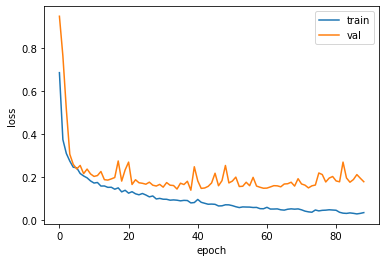

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

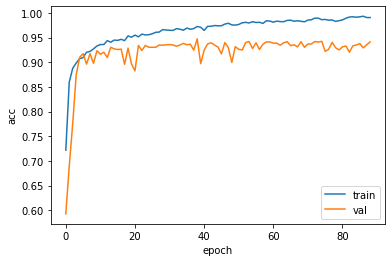

In [10]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(x_valid_c, y_valid)

75/75 [==============================] - 0s 4ms/step - loss: 0.1782 - sparse_categorical_accuracy: 0.9413


[0.1782163828611374, 0.9412500262260437]

In [12]:
scores = model.evaluate(x_test_c, y_test)

print('Test Acc', scores[1])
print('Test Loss', scores[0])
print(model.metrics_names[1], scores[1]*100)

94/94 [==============================] - 0s 4ms/step - loss: 0.1993 - sparse_categorical_accuracy: 0.9343
Test Acc 0.934333324432373
Test Loss 0.19925005733966827
sparse_categorical_accuracy 93.4333324432373


94/94 [==============================] - 0s 5ms/step


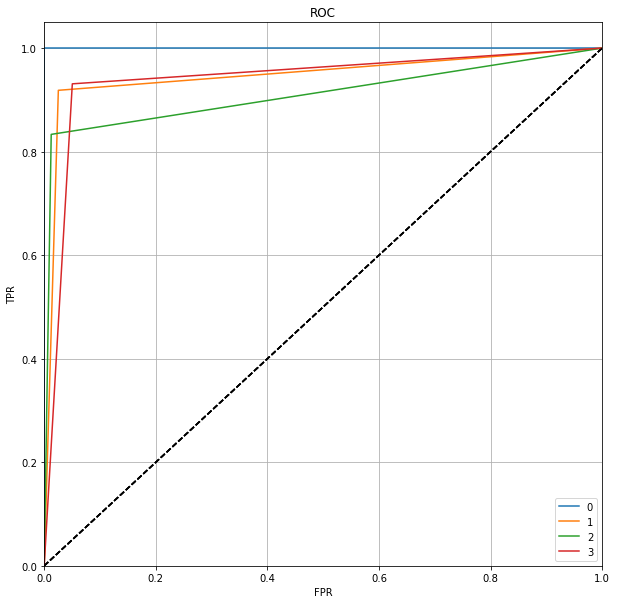

ROC AUC SCORE :  0.949303476392133


In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

predict_prob = model.predict(x_test_c)
predict_classes = np.argmax(predict_prob, axis = 1)

labels = [0, 1, 2, 3]

y_test_b = label_binarize(y_test, classes=labels)
y_pred_b = label_binarize(predict_classes, classes=labels)


n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], roc_auc[i]  = roc_curve(y_test_b[:, i], y_pred_b[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

# Plot the ROC curve
plt.figure(figsize=(10,10))
for idx, i in enumerate(range(n_classes)):
    plt.plot(fpr[i], tpr[i], label='%d' % i)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
plt.grid()
plt.show()

print("ROC AUC SCORE : ", roc_auc_score(y_test_b, y_pred_b, multi_class='raise'))

In [28]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_test, predict_classes)
print('accuracy_score : ',acc)

print(classification_report(y_test, predict_classes))

accuracy_score :  0.9343333333333333
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       995
         1.0       0.88      0.92      0.90       515
         2.0       0.93      0.83      0.88       534
         3.0       0.90      0.93      0.91       956

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.94      0.93      0.93      3000



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

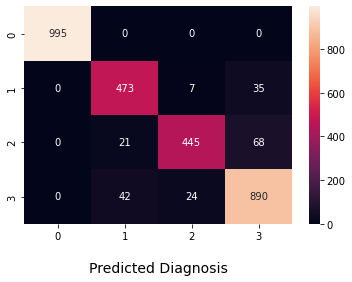

In [29]:
from pandas.core.frame import itertools
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, predict_classes)
ax = sns.heatmap(cf_matrix, annot=True, fmt='d',)
ax.set_xlabel("Predicted Diagnosis", fontsize = 14, labelpad = 20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_ylabel("Actual Diagnosis", fontsize = 14, labelpad = 20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

ax.set_title("Confusion Matrix", fontsize = 14, pad = 20)

In [30]:
print(cf_matrix)

[[995   0   0   0]
 [  0 473   7  35]
 [  0  21 445  68]
 [  0  42  24 890]]
